Code for the sgd classifier understanding

In [1]:

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SGD)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SGD Classifier
clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train, y_train)

# Evaluate accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


Code for the actual dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

# Load the dataset
file_path = "merged_dataset_with_mer.csv"
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=["earthquake"])  # Exclude non-numeric columns
y = df["earthquake"]  # Target variable (1 for earthquake, 0 for noise)



# Check class distribution
print("Class distribution:")
print(y.value_counts(normalize=True))

# Check for potential data leakage
print("\nFeature names:")
print(X.columns.tolist())

# Check for suspicious perfect correlations
correlations = X.corr()
perfect_corr = np.where(np.abs(correlations) > 0.95)
for i, j in zip(*perfect_corr):
    if i != j:  # Skip diagonal elements
        print(f"\nHigh correlation found between: {X.columns[i]} and {X.columns[j]}")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SGD classifier
sgd_clf = SGDClassifier(
    loss="log_loss",
    penalty="elasticnet",
    l1_ratio=0.5,  # mixing parameter for elastic net regularization
    alpha=0.0001,  # regularization strength
    max_iter=1000,
    tol=1e-3,
    random_state=42,
    class_weight='balanced'  # helps with imbalanced classes
)
sgd_clf.fit(X_train_scaled, y_train)

cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Predictions
y_pred = sgd_clf.predict(X_test_scaled)
y_pred_proba = sgd_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Classification Report:")
print(report)


Class distribution:
0    0.751456
1    0.248544
Name: earthquake, dtype: float64

Feature names:
['Before Mean', 'Before Median', 'Before Mode', 'Before Std Dev', 'Before Skewness', 'Before Kurtosis', 'Before Variance', 'Before Max', 'Before Min', 'Before Z-Score', 'Before Mean MER', 'Before Max MER', 'After Mean', 'After Median', 'After Mode', 'After Std Dev', 'After Skewness', 'After Kurtosis', 'After Variance', 'After Max', 'After Min', 'After Z-Score', 'After Mean MER', 'After Max MER']

High correlation found between: Before Std Dev and Before Variance

High correlation found between: Before Variance and Before Std Dev

High correlation found between: Before Mean MER and Before Max MER

High correlation found between: Before Mean MER and After Mean MER

High correlation found between: Before Max MER and Before Mean MER

High correlation found between: After Std Dev and After Max

High correlation found between: After Std Dev and After Min

High correlation found between: After Var

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Cross-validation scores: [0.98611111 0.97222222 0.94444444 0.98611111 1.        ]
Average CV score: 0.9778 (+/- 0.0377)
Accuracy: 0.9871
ROC AUC: 0.9994
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       1.00      0.95      0.98        44

    accuracy                           0.99       155
   macro avg       0.99      0.98      0.98       155
weighted avg       0.99      0.99      0.99       155



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


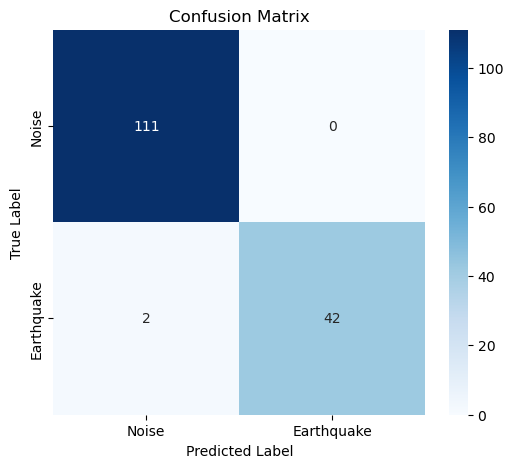

In [3]:
#only for the mer part

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Noise", "Earthquake"], yticklabels=["Noise", "Earthquake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

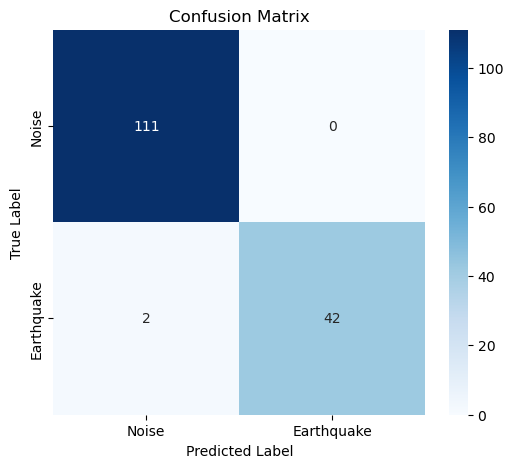

In [16]:
#confusion matrix for the sta lta mer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Noise", "Earthquake"], yticklabels=["Noise", "Earthquake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


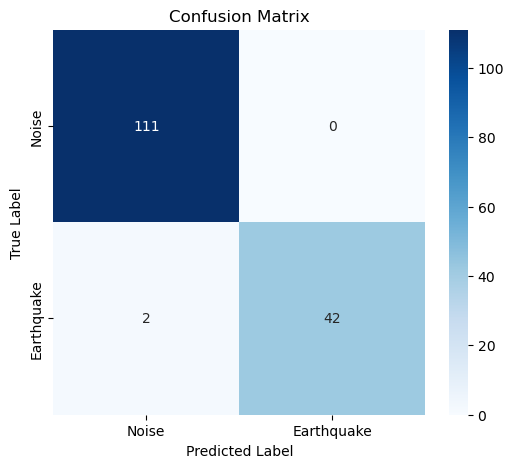

In [17]:
#confusion matrix for the sta lta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Noise", "Earthquake"], yticklabels=["Noise", "Earthquake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [4]:
import pickle

# Save trained model and scaler
with open("sgd_classifier_model_updated.pkl", "wb") as model_file:
    pickle.dump(sgd_clf, model_file)

with open("scaler_updated.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save feature names
feature_names = X_train.columns.tolist()
with open("feature_names_updated.pkl", "wb") as f:
    pickle.dump(feature_names, f)
